In [342]:
# Importing Libararies

import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

Utility Method to Do some charting

In [339]:

def plot_categorical(category):
    sns.barplot(data=loan_dataset,x=category,y='loan_status')
    plt.show()

Importing Loan Dataset


In [312]:
loan_dataset=pd.read_csv("loan.csv")

C:\Users\rarawat\AppData\Local\Temp\ipykernel_20248\4161518942.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_dataset=pd.read_csv("loan.csv")


In [317]:
#find coluns that does not add any values

column_with_nulls=loan_dataset.columns[100*(loan_dataset.isnull().sum()/len(loan_dataset.index))>90]

In [318]:
#drop columns_with_nulls
loan_dataset.drop(column_with_nulls,axis=1,inplace=True)

In [319]:
#Rechecking Nulls 
100*(loan_dataset.isnull().sum()/len(loan_dataset.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Description and mths_since_last_delinq sill shows 32 and 64 % of data missing. lets review this data and proceed accordingly


In [320]:
loan_dataset.loc[:,['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


Description is hand written text by user at the moment we cannot use this column

mths_since_last_delinq is the data that generated post LOAN is given, so we cannot use this variable to idenitfy if a person will be able to repay the loan

hence dropping these two columns as well

In [321]:
loan_dataset.drop(['desc','mths_since_last_delinq'],axis=1,inplace=True)

In [322]:
#Rechecking Nulls 
100*(loan_dataset.isnull().sum()/len(loan_dataset.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are minimal Nulls values as of now we can go ahead with this, as we are not building actual model right now.

In [323]:
#missing values in Row
loan_dataset.isnull().sum(axis=1)



0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [324]:
#check wheter a row has more than 5 missing values or not
len(loan_dataset[loan_dataset.isnull().sum(axis=1)>5].index)



0

## Lets start checking their formats

In [325]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [326]:
#fixing Interest Rate, removing % from string
loan_dataset['int_rate']=loan_dataset['int_rate'].apply(lambda x:str(x).replace('%',''))

loan_dataset['int_rate']=loan_dataset['int_rate'].astype(float)

In [327]:
#fixing emp_length

loan_dataset['emp_length'].apply(lambda x:re.sub("[^A-Za-z0-9]+","",str(x).strip()))


0        10years
1          1year
2        10years
3        10years
4          1year
          ...   
39712     4years
39713     3years
39714      1year
39715      1year
39716      1year
Name: emp_length, Length: 39717, dtype: object

In [328]:
#fixing term
loan_dataset['term']=loan_dataset['term'].apply(lambda x:re.sub("[a-z]","",str(x).strip()))



Types of variables -

1. those which are applicable to applicant
    (age,occupation,employement detail etc)
2. Loan Characterstic
    (amount of loan, intrest rate,purpose of loan etc)
3. Customer behavior ( post loan approval )   - REMOVE THESE FROM DATASET WHICH WE DO NOT NEED


Univariate analysis
Bivariate Analysus

use log scale

use seaborn - > box plot, distribution etc see screenshot in phone



In [329]:
#columns that got generated post LOAN Approval ,

remove_post_approval_columns=['open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens','delinq_2yrs','url','id','member_id']
remove_geographical_data=['zip_code','addr_state']

loan_dataset.drop(remove_post_approval_columns,axis=1,inplace=True)
loan_dataset.drop(remove_geographical_data,axis=1,inplace=True)


In [330]:
loan_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,earliest_cr_line,inq_last_6mths,application_type
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,Verified,Dec-11,Fully Paid,n,credit_card,Computer,27.65,Jan-85,1,INDIVIDUAL
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,n,car,bike,1.00,Apr-99,5,INDIVIDUAL
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,8.72,Nov-01,2,INDIVIDUAL
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,n,other,personel,20.00,Feb-96,1,INDIVIDUAL
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,...,Source Verified,Dec-11,Current,n,other,Personal,17.94,Jan-96,0,INDIVIDUAL


In [331]:
#Remove CURRENT FROM LOAN STATUS as that will be ongoing loan data

loan_dataset=loan_dataset[loan_dataset['loan_status']!='Current']


#change loan status to 0(CHARGED OFF) and 1(FULLYPAID)

loan_dataset['loan_status']=loan_dataset.loan_status.apply(lambda x: 1 if x=='Fully Paid' else 0)


#updating verification_status to numeric 




In [332]:
loan_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,earliest_cr_line,inq_last_6mths,application_type
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,Verified,Dec-11,1,n,credit_card,Computer,27.65,Jan-85,1,INDIVIDUAL
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,Source Verified,Dec-11,0,n,car,bike,1.00,Apr-99,5,INDIVIDUAL
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,Not Verified,Dec-11,1,n,small_business,real estate business,8.72,Nov-01,2,INDIVIDUAL
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,1,n,other,personel,20.00,Feb-96,1,INDIVIDUAL
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Source Verified,Dec-11,1,n,wedding,My wedding loan I promise to pay back,11.20,Nov-04,3,INDIVIDUAL


In [333]:
#find corelation between loan status and int rate

loan_dataset['loan_status'].corr(loan_dataset['int_rate'])

-0.21139019019940325

In [334]:

plt.figure(figsize=(15,8))
sns.set_theme(style='darkgrid')

<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='loan_status', ylabel='int_rate'>

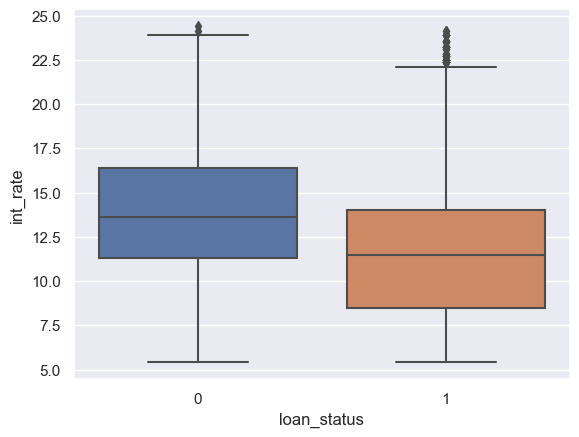

In [335]:
#scatter plot on intrest rate and loan status
import seaborn as sns
sns.boxplot(data=loan_dataset,x='loan_status',y='int_rate')

#we can see people who have higher interest rates have higher chances of getting a charged off

<Axes: xlabel='loan_status', ylabel='annual_inc'>

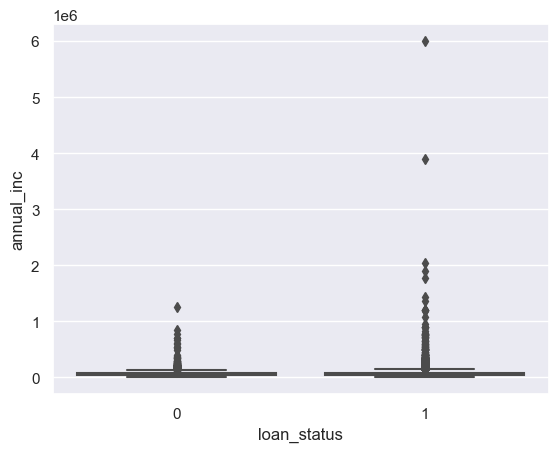

In [336]:
sns.boxplot(data=loan_dataset,x='loan_status',y='annual_inc')

#we can see people who have higher interest rates have higher chances of getting a charged off

<Axes: xlabel='loan_status', ylabel='annual_inc'>

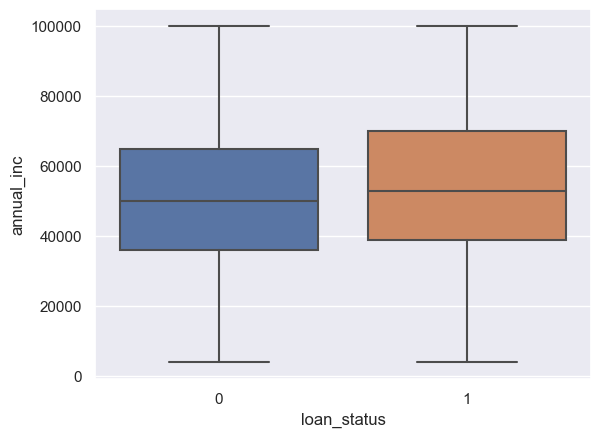

In [337]:
#remove outliers from salary

loan_dataset=loan_dataset[loan_dataset['annual_inc']<100000]
sns.boxplot(data=loan_dataset,x='loan_status',y='annual_inc')

#from box plot, on average it is evident that people with less salary are the defaulters

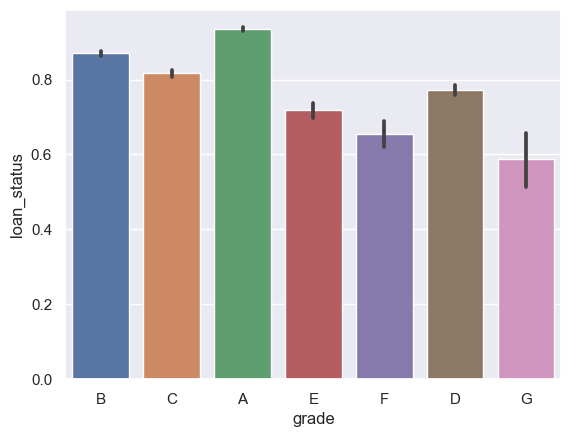

In [338]:
#loan status as per grades

sns.barplot(data=loan_dataset,x='grade',y='loan_status')
plt.show()

#as per data, Grade G,F are the feature that are not able to repay loans


In [340]:
loan_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,earliest_cr_line,inq_last_6mths,application_type
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,Verified,Dec-11,1,n,credit_card,Computer,27.65,Jan-85,1,INDIVIDUAL
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,Source Verified,Dec-11,0,n,car,bike,1.00,Apr-99,5,INDIVIDUAL
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,Not Verified,Dec-11,1,n,small_business,real estate business,8.72,Nov-01,2,INDIVIDUAL
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,1,n,other,personel,20.00,Feb-96,1,INDIVIDUAL
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Source Verified,Dec-11,1,n,wedding,My wedding loan I promise to pay back,11.20,Nov-04,3,INDIVIDUAL


In [341]:
#work with dates (issue_d)

loan_dataset['issue_d']=loan_dataset['issue_d'].apply(lambda x:datetime.strptime(x,'%b-%y'))
loan_dataset['month']=loan_dataset['issue_d'].apply(lambda x:x.month)
loan_dataset['year']=loan_dataset['issue_d'].apply(lambda x:x.year)


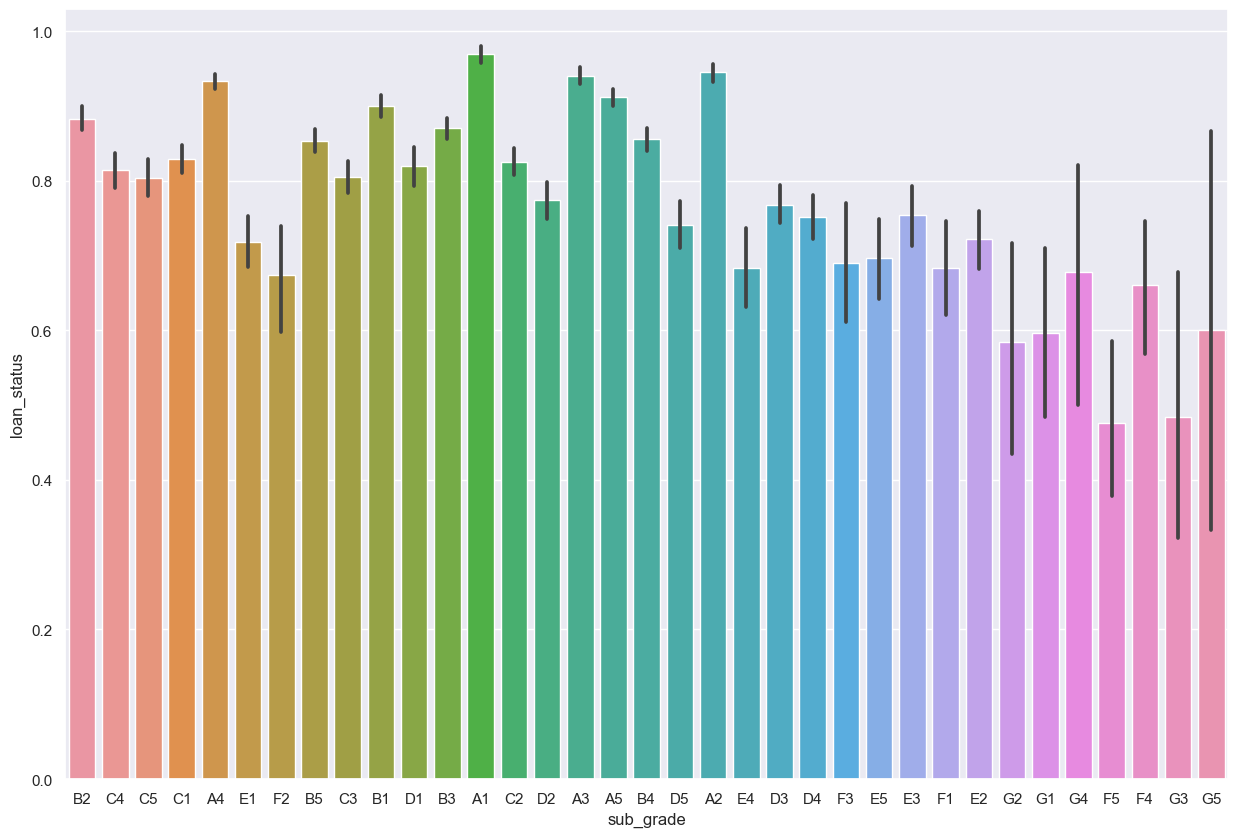

In [343]:
#loan status as per grades
plt.figure(figsize=(15,10))

plot_categorical('sub_grade')

#as per data, Grade G,F are the feature that are not able to repay loans


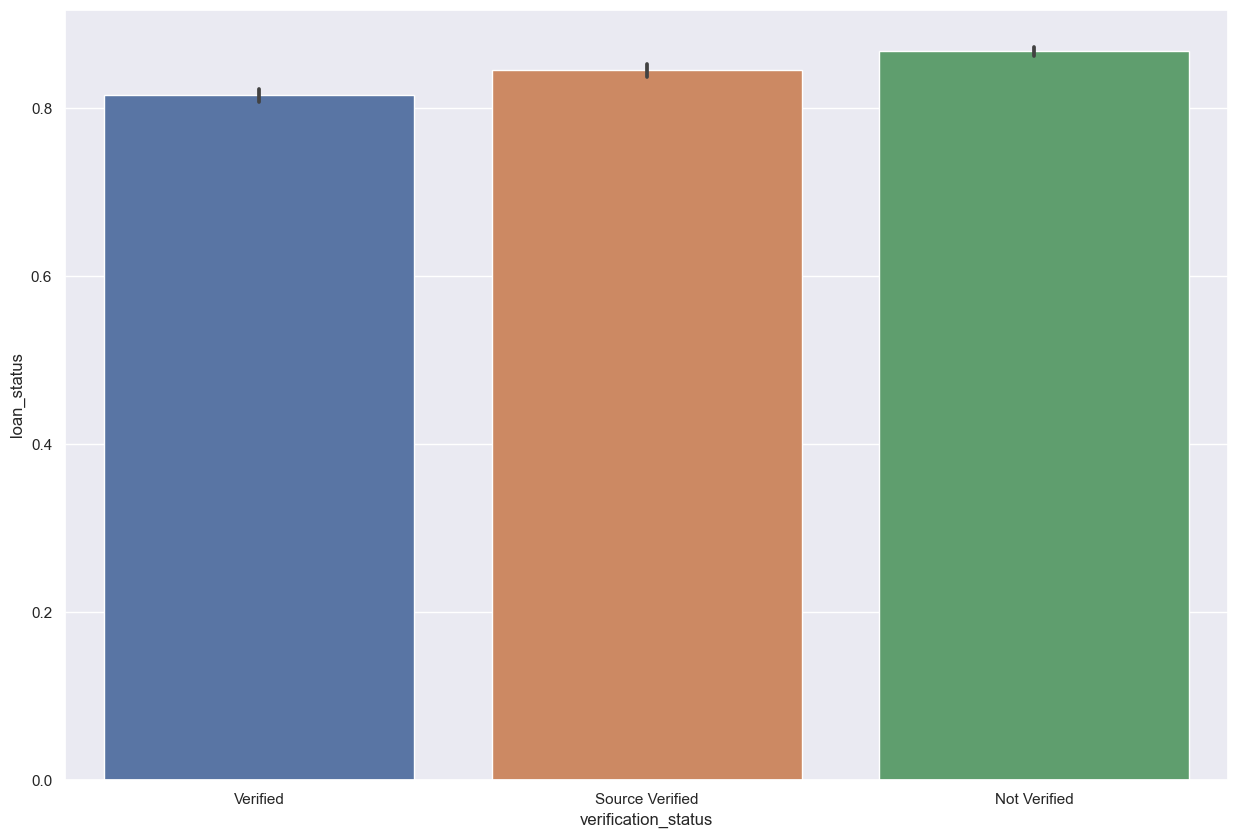

In [344]:
#loan status as per verification Grades
plt.figure(figsize=(15,10))

plot_categorical('verification_status')

#as per data, Grade G,F are the feature that are not able to repay loans


In [345]:

loan_dataset.groupby('year').year.count()

year
2007      204
2008     1347
2009     4007
2010     9796
2011    17244
Name: year, dtype: int64

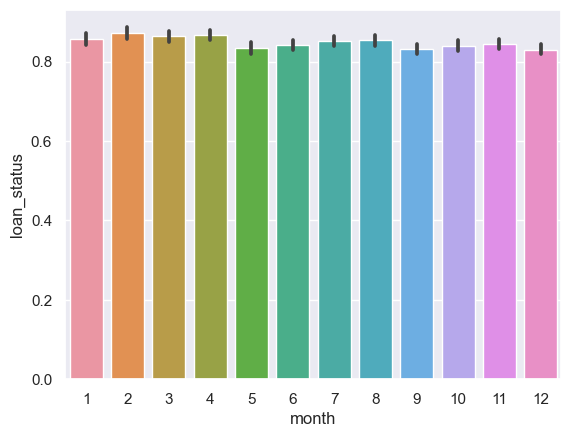

In [346]:
plot_categorical('month')


In [347]:
#lets categorize Int Rate 
loan_dataset['int_rate']=loan_dataset['int_rate'].apply(lambda x:"High" if x>15  else ("Medium" if x>10 and x<=15 else "Low"))

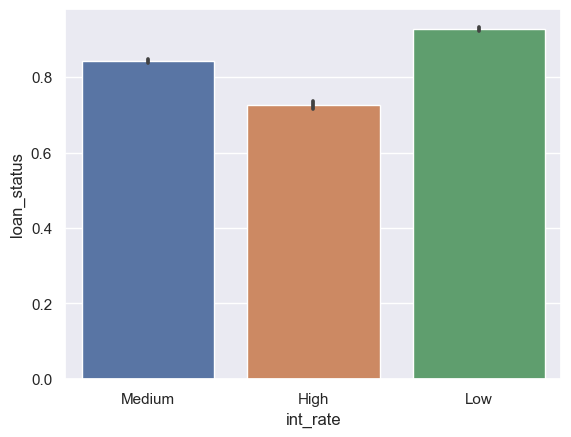

In [348]:
plot_categorical('int_rate')


In [349]:
#lets categorize employee expereince
def formatemployee_length(emplength):
    emplength=str(emplength)
    emplength=re.sub('[a-z]','',emplength)
    if(len(emplength)>0):
        emplength=emplength.replace('>','')
        emplength=emplength.replace('<','')
        emplength=emplength.replace('+','')
        emplength=emplength.strip()
    else:
        emplength=0
    return float(emplength)


In [350]:
loan_dataset['emp_length']=loan_dataset['emp_length'].apply(lambda x:formatemployee_length(x))
loan_dataset['emp_length']=loan_dataset['emp_length'].apply(lambda x:"Very Senior" if x>=10 else ("Senior" if x>5 and x<10 else "Junior"))


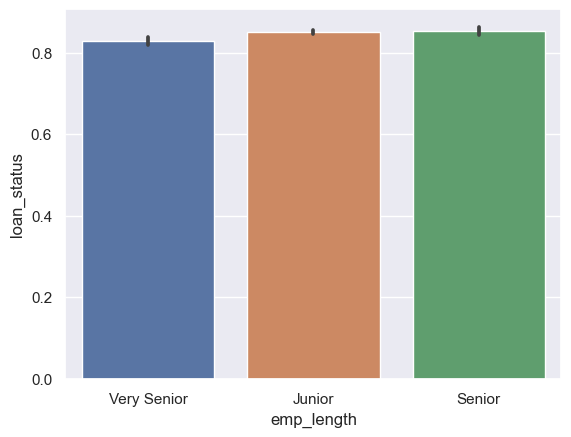

In [352]:
plot_categorical('emp_length')
#Very Senior Employees are not in Defaulters list, may be because they are married.

In [355]:
loan_dataset['emp_length'].value_counts()

emp_length
Junior         20502
Very Senior     6612
Senior          5484
Name: count, dtype: int64

In [ ]:
plot_categorical('installment')